In [8]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [9]:
abalone_df = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/abalone_csv.csv")

abalone_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [13]:
# We would like to test whether the whole weight of the snail is on average different between male and female snails.

abalone_df_M = abalone_df[(abalone_df['Sex'] == 'M')]
abalone_df_M.info()

abalone_df_F = abalone_df[(abalone_df['Sex'] == 'F')]
abalone_df_F.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    1528 non-null   object 
 1   Length                 1528 non-null   float64
 2   Diameter               1528 non-null   float64
 3   Height                 1528 non-null   float64
 4   Whole_weight           1528 non-null   float64
 5   Shucked_weight         1528 non-null   float64
 6   Viscera_weight         1528 non-null   float64
 7   Shell_weight           1528 non-null   float64
 8   Class_number_of_rings  1528 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 119.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 2 to 4175
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    1307 non-null   obje

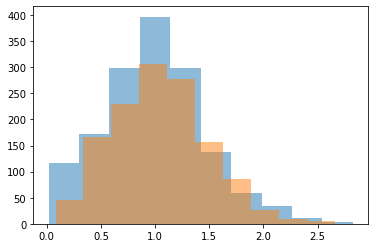

In [14]:
plt.hist(abalone_df_M['Whole_weight'], alpha = .5)
plt.hist(abalone_df_F['Whole_weight'], alpha = .5)
plt.show()

In [16]:
print(stats.describe(abalone_df_M['Whole_weight']))
print(stats.describe(abalone_df_F['Whole_weight']))

DescribeResult(nobs=1528, minmax=(0.0155, 2.8255), mean=0.9914594240837696, variance=0.22144682906633475, skewness=0.40560877693983, kurtosis=0.3522080855157492)
DescribeResult(nobs=1307, minmax=(0.08, 2.657), mean=1.0465321346595258, variance=0.18517212913502626, skewness=0.36807506367868875, kurtosis=0.059025885863292604)


In [17]:
stats.ttest_ind(abalone_df_M['Whole_weight'], abalone_df_F['Whole_weight'])

Ttest_indResult(statistic=-3.230536346547456, pvalue=0.0012497207919589404)

We would like to test whether the whole weight of the snail is on average different between male and female snails.

Does this data meet the assumptions to answer such a question statistically?
    Yes, because the skewness and kurtosis meets the parameter thresholds for a t-test.
    
What are the formal hypotheses?
    The whole wieght of the snail is on average different between male and female snails.
    
Conduct the hypothesis test. What is the p-value? 
    p < .001
What can you say given the p-value and significance level?
    There is a .001% chance of observing a difference as large as what is observed even if the two population means are identical (the null hypothesis is true)